This file contains the density plots per descriptor to check the importance per discriptor to allow for differentation between active and inactive inhibition for PKM-2 and ERK-2

In [96]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. Initialize datasets required for the plots

In [100]:
#Get inhibition data from 'tested_molecules.csv' and descriptor data from 'cleaned_descriptor_data'
df_inhibition = pd.read_csv('tested_molecules.csv')
df_descriptors = pd.read_csv('cleaned_descriptor_data')

#(Only used for initial testing for a single descriptor) Slice descriptors dataset to only show the molecules and the first descriptor
# df_descriptors = df_descriptors.iloc[:,:2]

#(Optional) display both datasets
# display(df_inhibition)
# display(df_descriptors)

2. Filter the datasets based on their inhibition properties

In [98]:
#Split inihibition dataset into thee distinct datasets based on the inhibition activity for PKM-2 and ERK-2
df_molecules_pkm2_inhibition = df_inhibition[df_inhibition['PKM2_inhibition'] == 1]['SMILES']
df_molecules_erk2_inhibition = df_inhibition[df_inhibition['ERK2_inhibition'] == 1]['SMILES']


#Sort the descriptor dataset based on the PKM-2 and ERK-2 inhibition
df_descriptor_pkm2 = df_descriptors[df_descriptors['SMILES'].isin(df_molecules_pkm2_inhibition)]
df_descriptor_erk2 = df_descriptors[df_descriptors['SMILES'].isin(df_molecules_erk2_inhibition)]

#(Optional) display the filtered datasets
# display(df_descriptor_pkm2)
# display(df_descriptor_erk2)

3. Plot the data

C:\Users\Dicky\AppData\Local\Temp\ipykernel_6956\3074526242.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_descriptor_erk2[descriptor], label = 'ERK-2', fill = True, color = 'Cyan')
C:\Users\Dicky\AppData\Local\Temp\ipykernel_6956\3074526242.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_descriptor_pkm2[descriptor], label = 'PKM-2', fill = True, color = 'Orange')
C:\Users\Dicky\AppData\Local\Temp\ipykernel_6956\3074526242.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_descriptor_pkm2[descriptor], label = 'PKM-2', fill = True, color = 'Orange')
C:\Users\Dicky\AppData\Local\Temp\ipykernel_6956\3074526242.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this 

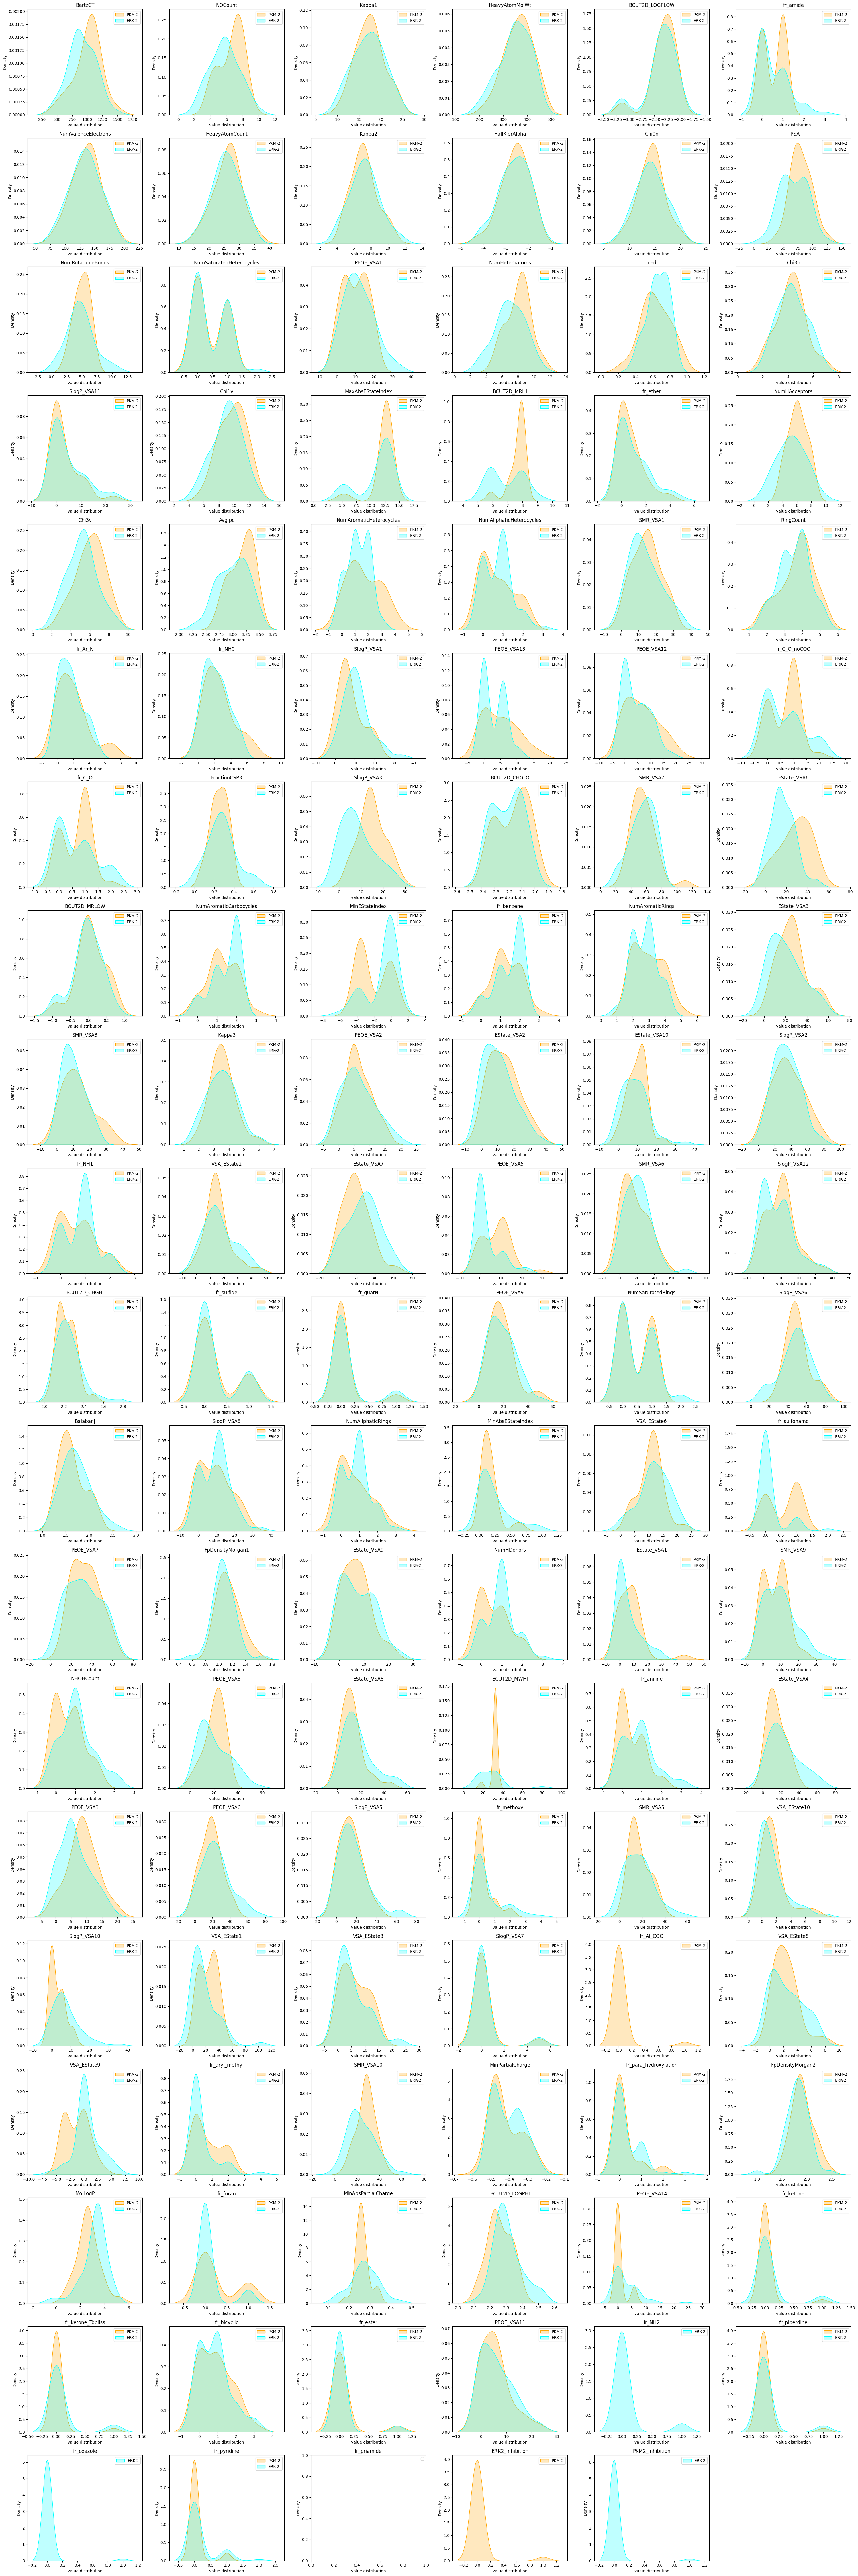

In [99]:
#Plot the datasets in one density plot
plt.figure(figsize=(30, 90)) # Set total figure size
for index, descriptor in enumerate(df_descriptors.iloc[:,1:]): #'enumerate' itterates over all column names where index represents the it's index number and descriptor represents the descriptor name
    plt.subplot(20, 6, index + 1) #Move to next plot position and set the subplot size

    # Plots an estimation of the density (amount of times each value is found in the descriptor column) of the values, 
    # over the distribution of the values found in the column for both PKM-2 and ERK-2 inhibition. If there is little to no
    # overlap, a clear distinction can be made between the resulting descriptor value and inhibition type.
    sns.kdeplot(df_descriptor_pkm2[descriptor], label = 'PKM-2', fill = True, color = 'Orange')
    sns.kdeplot(df_descriptor_erk2[descriptor], label = 'ERK-2', fill = True, color = 'Cyan')

    # Plot stuff
    plt.title(descriptor)
    plt.xlabel('value distribution')
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()

plt.show()